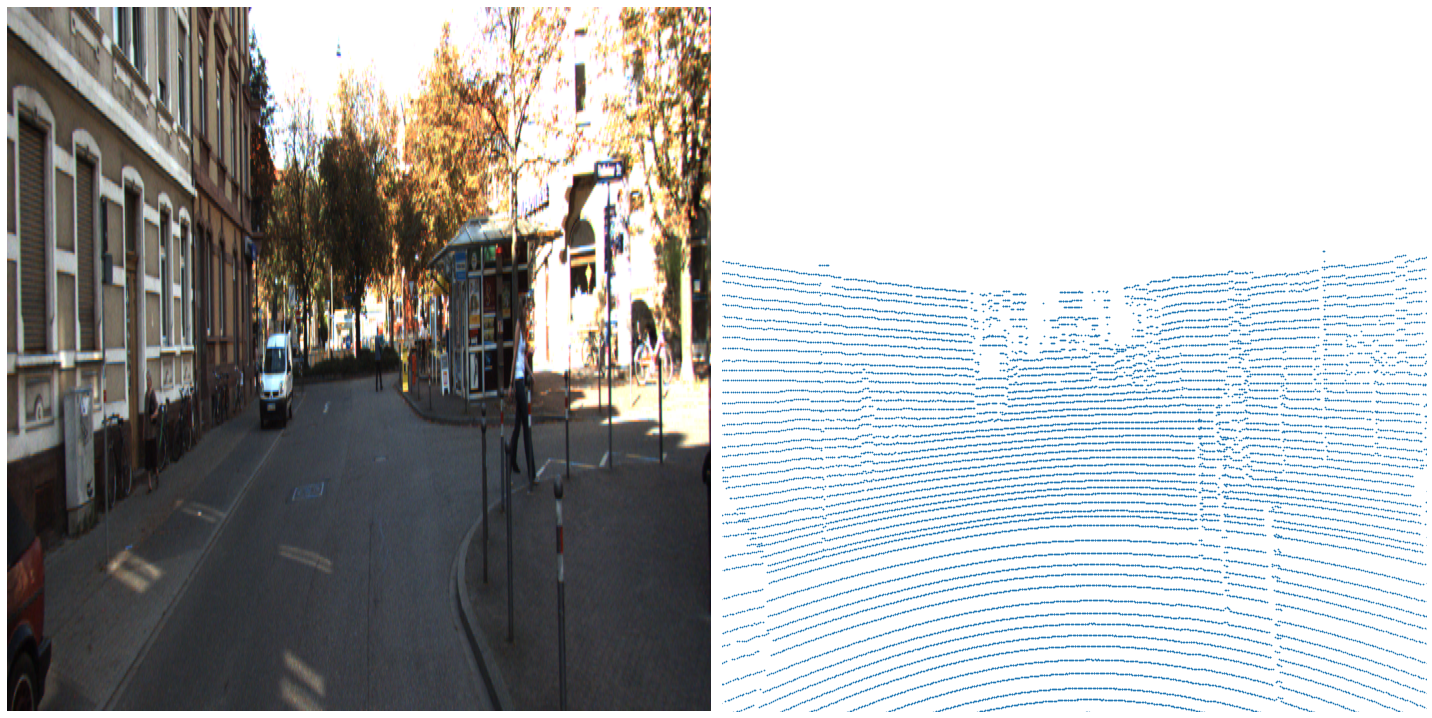

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# 데이터 파일 경로
file_num = '000011'
calib_file = f'./calib/{file_num}.txt'
image_file = f'./training/image_2/{file_num}.png'
lidar_file = f'./vel/{file_num}.bin'

# 교정 파일 읽기 및 파싱
def read_calib_file(filepath):
    with open(filepath, 'r') as f:
        lines = f.readlines()

    P0 = np.array([float(i) for i in lines[0].split(' ')[1:]]).reshape(3, 4)
    P1 = np.array([float(i) for i in lines[1].split(' ')[1:]]).reshape(3, 4)
    P2 = np.array([float(i) for i in lines[2].split(' ')[1:]]).reshape(3, 4)
    P3 = np.array([float(i) for i in lines[3].split(' ')[1:]]).reshape(3, 4)
    R0_rect = np.array([float(i) for i in lines[4].split(' ')[1:]]).reshape(3, 3)
    Tr_velo_to_cam = np.array([float(i) for i in lines[5].split(' ')[1:]]).reshape(3, 4)
    Tr_imu_to_velo = np.array([float(i) for i in lines[6].split(' ')[1:]]).reshape(3, 4)

    return P0, P1, P2, P3, R0_rect, Tr_velo_to_cam, Tr_imu_to_velo

P0, P1, P2, P3, R0_rect, Tr_velo_to_cam, Tr_imu_to_velo = read_calib_file(calib_file)

R0 = np.eye(4)
R0[:3, :3] = R0_rect
P = P2
Tr = np.vstack([Tr_velo_to_cam, [0, 0, 0, 1]])

# 이미지 읽기
img = cv2.imread(image_file)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# LiDAR 데이터 읽기
with open(lidar_file, 'rb') as f:
    data = np.fromfile(f, dtype=np.float32).reshape(-1, 4)

# LiDAR 데이터를 이미지에 매핑
XYZ1 = np.vstack((data[:, :3].T, np.ones((1, data.shape[0]))))
xy1 = P @ R0 @ Tr @ XYZ1
s = xy1[2, :]
x = xy1[0, :] / s
y = xy1[1, :] / s

k = s > 0


# 이미지의 가로세로 비율을 계산합니다.
aspect_ratio = float(img.shape[1]) / img.shape[0]

# Figure의 크기를 조정합니다.
# figsize의 첫 번째 값(너비)를 이미지의 가로세로 비율에 맞추어 조정합니다.
fig, axs = plt.subplots(1, 2, figsize=(20, 25 ))

# 이미지 subplot
axs[0].imshow(img_rgb)
axs[0].axis('off')  # 축 정보 끄기

# 포인트 클라우드 subplot
axs[1].plot(x[k], img.shape[0] - y[k], '.', markersize=1.5)
axs[1].set_xlim([0, img.shape[1]])
axs[1].set_ylim([0,img.shape[0]])  # y축의 범위를 뒤집어서 이미지와 동일한 방향으로 설정
axs[1].axis('off')  # 축 정보 끄기

# 서브플롯의 가로세로 비율을 이미지와 동일하게 설정합니다.
for ax in axs:
    ax.set_aspect(aspect_ratio)

plt.tight_layout()  # subplot 간격 조정
plt.show()



In [ ]:
import numpy as np
import cv2

# Assuming P, R0, Tr, data, and img are already defined and loaded as per previous steps.

# LiDAR data to image plane mapping
XYZ1 = np.vstack((data[:, :3].T, np.ones((1, data.shape[0]))))  # Adding a row of ones for homogeneous coordinates
xy1 = P @ R0 @ Tr @ XYZ1  # Projecting LiDAR points onto the image plane
s = xy1[2, :]
x = (xy1[0, :] / s).astype(np.int32)
y = (xy1[1, :] / s).astype(np.int32)

img_mapped = img.copy()  # Create a copy of the image to draw on
img_h, img_w = img.shape[:2]

for i in range(len(s)):
    ix = x[i]
    iy = y[i]
    if s[i] > 0 and 0 <= ix < img_w and 0 <= iy < img_h:
        img_mapped[iy, ix, :] = [0, 255, 0]  # Coloring the pixel in green

# Display the mapped image
# 쥬피터에서 멈춤....
cv2.imshow('LiDAR points on Image', img_mapped)
cv2.waitKey(0)
cv2.destroyAllWindows()


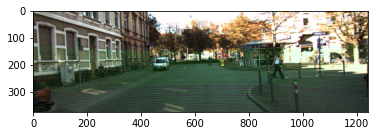

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Assuming P, R0, Tr, data, and img are already defined and loaded as per previous steps.

# LiDAR data to image plane mapping
XYZ1 = np.vstack((data[:, :3].T, np.ones((1, data.shape[0]))))  # Adding a row of ones for homogeneous coordinates
xy1 = P @ R0 @ Tr @ XYZ1  # Projecting LiDAR points onto the image plane
s = xy1[2, :]
x = (xy1[0, :] / s).astype(np.int32)
y = (xy1[1, :] / s).astype(np.int32)

img_mapped = img.copy()  # Create a copy of the image to draw on
img_h, img_w = img.shape[:2]

for i in range(len(s)):
    ix = x[i]
    iy = y[i]
    if s[i] > 0 and 0 <= ix < img_w and 0 <= iy < img_h:
        img_mapped[iy, ix, :] = [0, 255, 0]  # Coloring the pixel in green

# Convert the image from BGR to RGB
img_mapped_rgb = cv2.cvtColor(img_mapped, cv2.COLOR_BGR2RGB)

# Display the mapped image using matplotlib
plt.imshow(img_mapped_rgb)
# plt.axis('off')  # Optional: Hide axis
plt.show()
